In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
class LJ(object):
    '''Class to simulate LJ system'''
    
    def __init__(self, N, dim):
        self.numParticles = N
        self.dim = dim
        self.positions = np.zeros( (N,dim))
        self.velocities = np.zeros( (N,dim))
        self.forces = np.zeros( (N,dim))
        self.lj_sigma = 1.0
        self.lj_epsilon = 1.0
        
    def position_initialization(self, boxL):
        '''initialise the positions of particles randomly, in a boxL size box '''
        self.positions = np.random.random_sample( (self.numParticles, self.dim))* boxL
        
    def velocities_MaxwellBoltzmann(self, kT):
        '''initialize velocities to Maxwell-Boltzmann distrition at temp kT'''
        factor = sqrt(kT)
        self.velocities = factor*np.random.normal(0.,1.,size=( (self.numParticles,self.dim)))
                                           
        
    def force_twoParticle_LJ(self, p_i, p_j):
        '''compute the force of interaction between particles p_i and p_j due to LJ'''
        
        rvec_ij = self.positions[p_i] - self.positions[p_j]
        d_ij = np.linalg.norm( rvec_ij )        
        s6 = pow(self.lj_sigma/d_ij , 6)        
        factor = 24* self.lj_epsilon * s6 *(2 * s6 -1 )        
        return factor*rvec_ij/pow(d_ij,2)
    
    def calcForces(self):
        ''' calcaulte the forces on all particles of the system'''
        
        self.forces *= 0        
        for p_i in range(self.numParticles):
            for p_j in range(p_i):
                f_i = self.force_twoParticle_LJ(p_i, p_j)
                self.forces[p_i] += f_i
                self.forces[p_j] -= f_i
                
    def EulerIntegrate(self, dt):
        '''Euler interation with timestep dt'''
        
        self.calcForces()
        self.positions += dt * self.velocities
        self.velocities += dt * self.forces 
        
    def configDraw(self):
        figure(figsize=(5,5))
        axis = gca()
        axis.set_xlim(-5,self.boxL+5)
        axis.set_ylim(-5,self.boxL+5)
        
        circles = []
        for i in range(self.numParticles):
            circles.append( axis.add_patch( Circle(self.positions[i], radius=0.5, 
                                                   linewidth=2, edgecolor='black') ) )
        show()
        
    def minimize(self, dist_max):
        '''randomly selecting a particle, dispacing it randomly and 
        accept the move if energy is lower, reject otherwise'''

        p_i = np.random.randint(0,self.numParticles)
        dr = (2*np.random.random( (self.dim, ))-1)*dist_max
        
        pe_before = self.pe_interaction(p_i)
        self.positions[p_i] += dr
        pe_after = self.pe_interaction(p_i)
        
        if (pe_after > pe_before): #undo the move
            self.positions[p_i] -= dr
            
    def pe_interaction(self, p_i):
        ''' interaction energy of particle p_i with all other particles'''
        pe = 0.0
        for p_j in range(self.numParticles):
            if (p_j != p_i): 
                pe +=  self.pe_twoParticle_LJ(p_i,p_j)
        return pe
    
    def pe_twoParticle_LJ(self,p_i,p_j):
        '''LJ interaction energy between particle p_i and p_j'''
        d_ij = np.linalg.norm ( self.positions[p_i] - self.positions[p_j])
        s6 = pow(self.lj_sigma / d_ij, 6)
        return 4*self.lj_epsilon*s6*(s6-1)
    
    def totalPE(self):
        '''calculate the total potential energy of the system'''
        pe = 0.0
        for p_j in range(self.numParticles):
            for p_i in range(p_j):
                pe +=  self.pe_twoParticle_LJ(p_i,p_j)
        return pe
    
    def totalKE(self):
        '''calculate the total Kinteic Energy of the syste,'''
        return 0.5* np.sum( self.velocities **2 )
    
    
    def velocityVerletIntegrate(self,dt):
        self.calcForces()
        self.velocities += 0.5*dt*self.forces
        self.positions +=  dt*self.velocities
        self.calcForces()
        self.velocities += 0.5*dt*self.forces
        
        

In [90]:
s1 = LJ(64,2)

In [91]:
print(s1.dim, s1.numParticles)

2 64


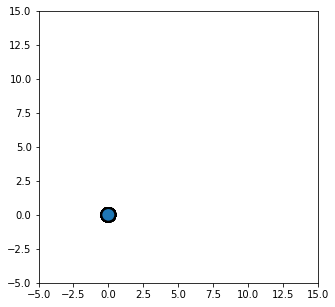

In [92]:
s1.boxL = 10.0
s1.configDraw()

In [93]:
s1.position_initialization(10.0)

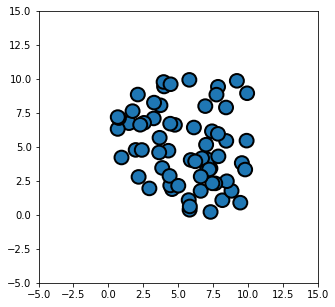

In [94]:
s1.configDraw()

In [95]:
pe_store = []

In [98]:

for i in range(1000):
    s1.minimize(0.1)
    if (i%10==0):
        pe_store.append(s1.totalPE())

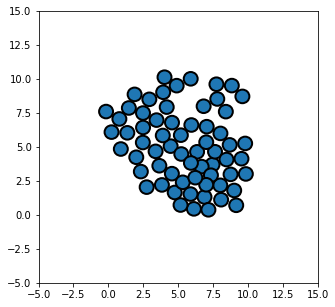

In [99]:
s1.configDraw()

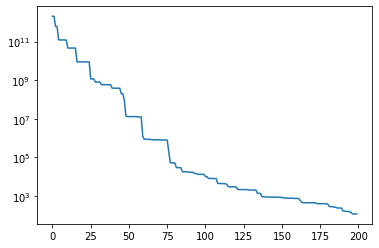

In [100]:
tottotsemilogy(pe_store)

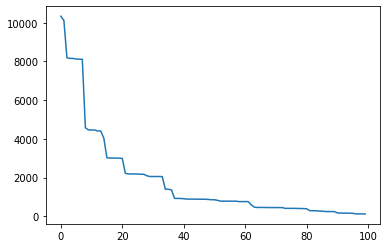

In [101]:
plot(pe_store[-100:])

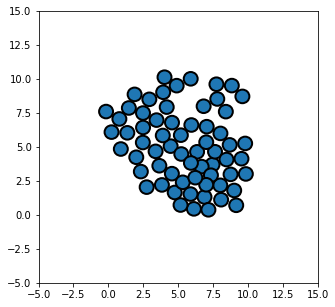

In [102]:
s1.configDraw()

In [103]:
numSteps= 1000
for step in range(numSteps):
    s1.velocityVerletIntegrate(0.001)
    if (step % 10 ==0):
        ke = s1.totalKE()
        pe = s1.totalPE()
        print(step, ke, pe, ke+pe)

0 1.7175271211305678 117.50719138770008 119.22471850883065
10 105.54991876374096 13.402696120306295 118.95261488404725
20 129.10454284083536 -10.049566771026058 119.0549760698093
30 134.1046241906877 -15.03011325051303 119.07451094017468
40 160.68883682222713 -41.62623058291073 119.06260623931641
50 176.21010770379246 -57.1372116072794 119.07289609651306
60 182.71462022855798 -63.643034546545934 119.07158568201204
70 182.03754604833824 -62.951109163205075 119.08643688513317
80 187.78824468575496 -68.7129417500974 119.07530293565756
90 191.63036731414678 -72.54321421794033 119.08715309620645
100 201.86975031388357 -82.78738743689995 119.08236287698362
110 212.27229044754512 -93.1936417996416 119.07864864790352
120 214.03406026714822 -94.95021416321232 119.0838461039359
130 211.8804429097833 -92.79241412854304 119.08802878124027
140 211.16258091061718 -92.07373231936756 119.08884859124962
150 213.0729407069383 -93.98489881233083 119.08804189460749
160 216.22578061085605 -97.1387063988519